# Example of WR15 Transfer Measurement

## Introduction
To provide traceable corrections (reference planes) in VNA measurements, we measure the s-parameters of a calibration kit in the reference plane of the standards. This makes the calibration standards a transfer standard for the uncertainties of the correction used to determine the reference plane of the standards. If this reference plane is determined through primary standards (TRL or LRL), then the calibration kit (SOLT) becomes traceable. This notebook is a set of measurements to provide this type of traceability using a WR15 LRL calibration kit to characterize multiple SOL calibration kits. 

## Description of Measurements
Each device was measured as two port scattering parameters, two port wave parameters, and each port was separately measured and saved as 1-port s parameters and 1-port wave parameters.  In addition, each device was measured multiple times. If noted these different measurements represented a disconnect reconnect cycle, else they are only a repeated measurement without mechanical change.  

## Post Processing Tips for Microwave Uncertainty Framework
<ol>
<li> Make sure the reference impedance is <span style="font-weight:bold">NOT</span> set to 50 &Omega;s</li>
<img src="./WR15_Example_Files/Z_Reference.png">
<br/>
<hr/>
<li> Make sure the cut off frequency for the wave guide is set to a negative number </li>
<img src="./WR15_Example_Files/CutOff.png">
<br/>
<hr/>
<li> The model for an offset short is a cascade of a delay line and short. This is used as a check to the TRL calibrations</li>

</ol>
<h2> <a href="#Acquisition" style="color:blue">Scripts Demonstrating Data Acquisition </a> </h2>

<h2><a id="Acquisition">Script demonstrating acquisition</a></h2>
This script was used to acquire data for WR15 calkits using the ZVA and OML WR15 heads on 03/13/2018. The scattering parameters and wave parameters are separate measurement passes without a reconnect cycle. To transform the wave parameters into scattering parameters use the function w2p_to_s2p located in the module pyMez.Code.Analysis.Transformations. This converts them into 3-receiver style scattering parameters (needs switch terms) 

In [1]:
# note the Importing statements are diagnostics and can be disabled by setting VERBOSE_IMPORT to false in pyMez/__init__.py
from pyMez import *
from Code.Analysis.Transformations import *

Importing pyMez, this should take roughly 30 seconds
Importing Code.DataHandlers.GeneralModels
It took 2.754 s to import Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.HTMLModels
It took 0.427 s to import Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.NISTModels
It took 6.309 s to import Code.DataHandlers.NISTModels
Importing Code.DataHandlers.TouchstoneModels
It took 0.008 s to import Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
It took 0.251 s to import Code.DataHandlers.XMLModels
Importing Code.DataHandlers.ZipModels
It took 0.031 s to import Code.DataHandlers.ZipModels
Importing Code.InstrumentControl.Experiments
It took 1.233 s to import Code.InstrumentControl.Experiments
Importing Code.InstrumentControl.Instruments
It took 0.014 s to import Code.InstrumentControl.Instruments
Importing Code.Utils.Names
It took 0.011 s to import Code.Utils.Names
It took 11.038 s to import all of the active modules


In [2]:
zva=VNA("GPIB::20")

In [3]:
frequency_start=50*10**9
frequency_stop=75*10**9
number_points=251
#data_directory=r"C:\Share\WR15_20180213"
base_data_directory=r"C:\Share\WR15_OML_20180309"

In [4]:
#test_frequency_list=np.linspace(frequency_start,frequency_stop,number_points)
# Note with the frequency converter you can't initialize the sweeps. Set up the zva traces manually
# to have "S11","S21","S12","S22","A1_D1","B1_D1","A2_D1","B2_D1" as names
# todo: add method to VNA, VNA.add_all_traces()

Begining Measurements at 2018-03-13 15:10:50.779000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\s2p\True_Thru_WR15_20180313_002.s2p
 It took 50 seconds


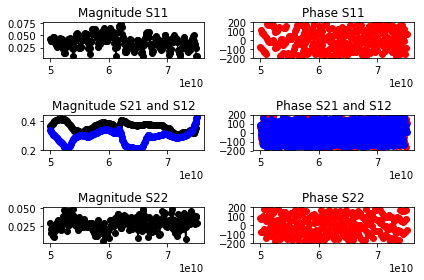

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\s1p\port1\True_Thru_WR15_Port1_20180313_002.s1p


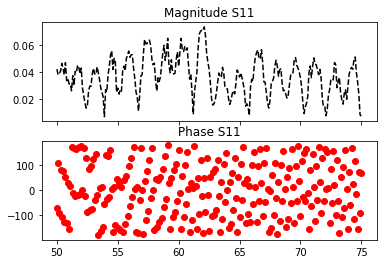

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\s1p\port2\True_Thru_WR15_Port2_20180313_002.s1p


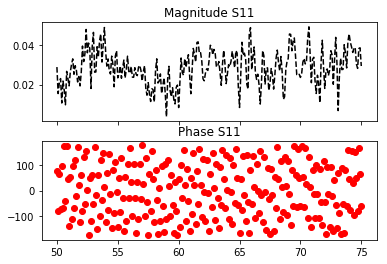

 It took 54 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\w2p\True_Thru_WR15_Wave_Parameters_20180313_002.w2p
 It took 104 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\w1p\port1\True_Thru_WR15_Wave_Parameters_Port1_20180313_002.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\w1p\port2\True_Thru_WR15_Wave_Parameters_Port2_20180313_002.w1p
 It took 205 seconds
 Converting w2p to switch terms ...
 Measurements finished at 2018-03-13 15:14:15.999000
 Total time of measurements was 0:03:25.220000 


In [4]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Thru _WO_AlignmentPins"
specific_description="True_Thru"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
print( " Converting w2p to switch terms ...")
switch_terms_directory=os.path.join(data_directory,subdirectory,"SwitchTerms")
name=auto_name(directory=w2p_directory,specific_descriptor="G"+specific_description,
               general_descriptor="WR15_Switch_Terms",extension="s2p")
switch_terms=W2p_to_SwitchTerms(w2p)
switch_terms.path=os.path.join(switch_terms_directory,name)
switch_terms.save()
stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 15:17:40.311000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\s2p\True_Thru_WR15_20180313_003.s2p
 It took 50 seconds


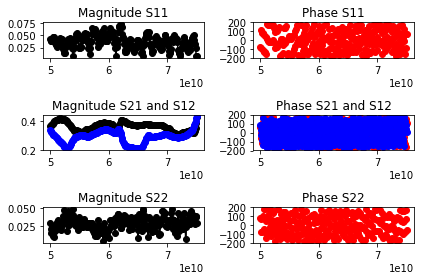

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\s1p\port1\True_Thru_WR15_Port1_20180313_003.s1p


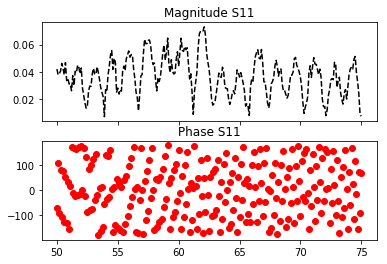

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\s1p\port2\True_Thru_WR15_Port2_20180313_003.s1p


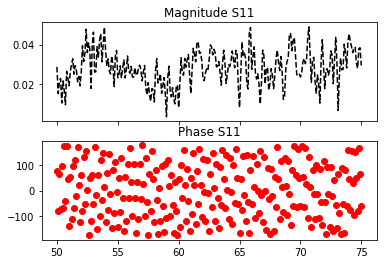

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\w2p\True_Thru_WR15_Wave_Parameters_20180313_003.w2p
 It took 104 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\w1p\port1\True_Thru_WR15_Wave_Parameters_Port1_20180313_003.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\w1p\port2\True_Thru_WR15_Wave_Parameters_Port2_20180313_003.w1p
 It took 204 seconds
 Converting w2p to switch terms ...
 Measurements finished at 2018-03-13 15:21:05.185000
 Total time of measurements was 0:03:24.874000 


In [5]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Thru _WO_AlignmentPins"
specific_description="True_Thru"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
print( " Converting w2p to switch terms ...")
switch_terms_directory=os.path.join(data_directory,subdirectory,"SwitchTerms")
name=auto_name(directory=w2p_directory,specific_descriptor="G"+specific_description,
               general_descriptor="WR15_Switch_Terms",extension="s2p")
switch_terms=W2p_to_SwitchTerms(w2p)
switch_terms.path=os.path.join(switch_terms_directory,name)
switch_terms.save()
stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 15:23:47.617000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\s2p\True_Thru_WR15_20180313_004.s2p
 It took 50 seconds


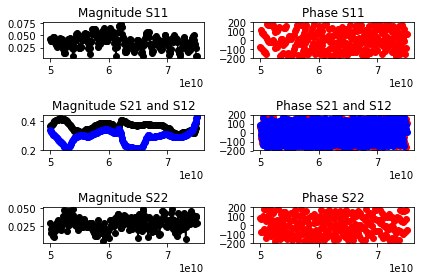

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\s1p\port1\True_Thru_WR15_Port1_20180313_004.s1p


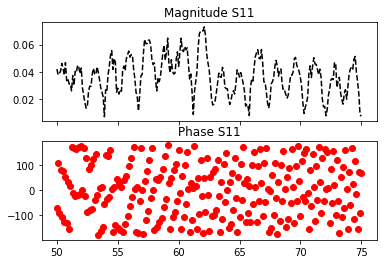

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\s1p\port2\True_Thru_WR15_Port2_20180313_004.s1p


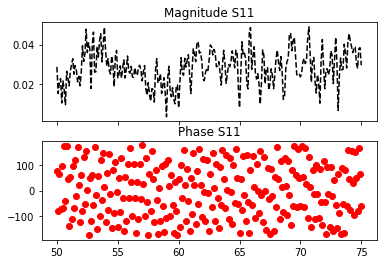

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\w2p\True_Thru_WR15_Wave_Parameters_20180313_004.w2p
 It took 103 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\w1p\port1\True_Thru_WR15_Wave_Parameters_Port1_20180313_004.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\w1p\port2\True_Thru_WR15_Wave_Parameters_Port2_20180313_004.w1p
 It took 204 seconds
 Converting w2p to switch terms ...
Saving switch terms at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\SwitchTerms\GTrue_Thru_WR15_Switch_Terms_20180313_001.s2p
 Measurements finished at 2018-03-13 15:27:12.266000
 Total time of measurements was 0:03:24.649000 


In [6]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Thru _WO_AlignmentPins"
specific_description="True_Thru"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
print( " Converting w2p to switch terms ...")
switch_terms_directory=os.path.join(data_directory,subdirectory,"SwitchTerms")
name=auto_name(directory=w2p_directory,specific_descriptor="G"+specific_description,
               general_descriptor="WR15_Switch_Terms",extension="s2p")
switch_terms=W2p_to_SwitchTerms(w2p)
switch_terms.path=os.path.join(switch_terms_directory,name)
switch_terms.save()
print("Saving switch terms at {0}".format(os.path.join(switch_terms_directory,name)))
stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 15:37:34.385000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Thru\s2p\True_Thru_WR15_20180313_001.s2p
 It took 50 seconds


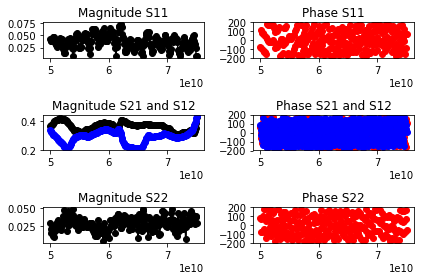

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Thru\s1p\port1\True_Thru_WR15_Port1_20180313_001.s1p


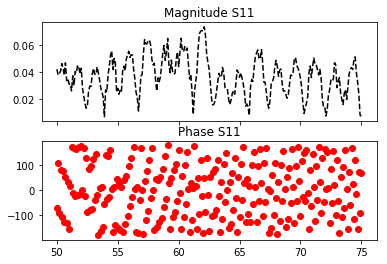

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Thru\s1p\port2\True_Thru_WR15_Port2_20180313_001.s1p


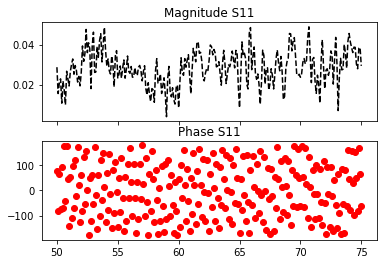

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Thru\w2p\True_Thru_WR15_Wave_Parameters_20180313_001.w2p
 It took 104 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Thru\w1p\port1\True_Thru_WR15_Wave_Parameters_Port1_20180313_001.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Thru\w1p\port2\True_Thru_WR15_Wave_Parameters_Port2_20180313_001.w1p
 It took 204 seconds
 Converting w2p to switch terms ...
Saving switch terms at C:\Share\WR15_OML_20180309\Thru\SwitchTerms\GTrue_Thru_WR15_Switch_Terms_20180313_001.s2p
 Measurements finished at 2018-03-13 15:40:59.292000
 Total time of measurements was 0:03:24.907000 


In [7]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Thru"
specific_description="True_Thru"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
print( " Converting w2p to switch terms ...")
switch_terms_directory=os.path.join(data_directory,subdirectory,"SwitchTerms")
name=auto_name(directory=switch_terms_directory,specific_descriptor="G"+specific_description,
               general_descriptor="WR15_Switch_Terms",extension="s2p")
switch_terms=W2p_to_SwitchTerms(w2p)
switch_terms.path=os.path.join(switch_terms_directory,name)
switch_terms.save()
print("Saving switch terms at {0}".format(os.path.join(switch_terms_directory,name)))
stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 15:43:04.076000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Thru\s2p\True_Thru_WR15_20180313_002.s2p
 It took 50 seconds


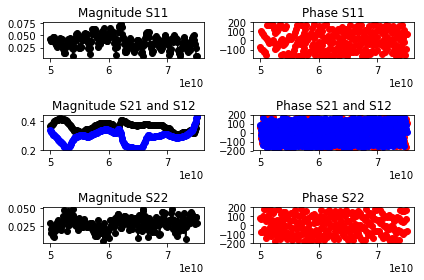

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Thru\s1p\port1\True_Thru_WR15_Port1_20180313_002.s1p


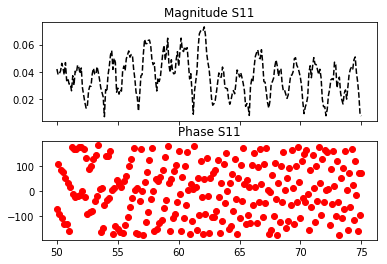

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Thru\s1p\port2\True_Thru_WR15_Port2_20180313_002.s1p


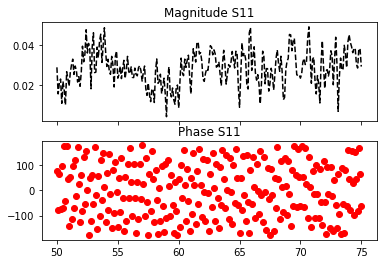

 It took 51 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Thru\w2p\True_Thru_WR15_Wave_Parameters_20180313_002.w2p
 It took 102 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Thru\w1p\port1\True_Thru_WR15_Wave_Parameters_Port1_20180313_002.w1p
 It took 152 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Thru\w1p\port2\True_Thru_WR15_Wave_Parameters_Port2_20180313_002.w1p
 It took 202 seconds
 Converting w2p to switch terms ...
Saving switch terms at C:\Share\WR15_OML_20180309\Thru\SwitchTerms\GTrue_Thru_WR15_Switch_Terms_20180313_002.s2p
 Measurements finished at 2018-03-13 15:46:27.022000
 Total time of measurements was 0:03:22.946000 


In [8]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Thru"
specific_description="True_Thru"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
print( " Converting w2p to switch terms ...")
switch_terms_directory=os.path.join(data_directory,subdirectory,"SwitchTerms")
name=auto_name(directory=switch_terms_directory,specific_descriptor="G"+specific_description,
               general_descriptor="WR15_Switch_Terms",extension="s2p")
switch_terms=W2p_to_SwitchTerms(w2p)
switch_terms.path=os.path.join(switch_terms_directory,name)
switch_terms.save()
print("Saving switch terms at {0}".format(os.path.join(switch_terms_directory,name)))
stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 15:48:23.649000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Thru\s2p\True_Thru_WR15_20180313_003.s2p
 It took 50 seconds


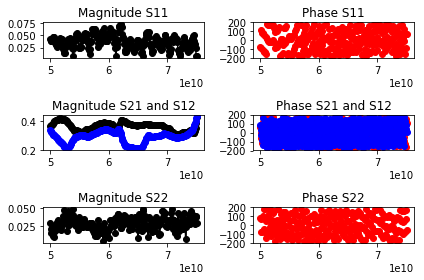

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Thru\s1p\port1\True_Thru_WR15_Port1_20180313_003.s1p


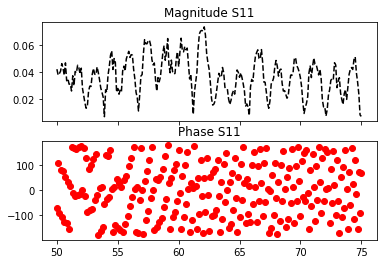

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Thru\s1p\port2\True_Thru_WR15_Port2_20180313_003.s1p


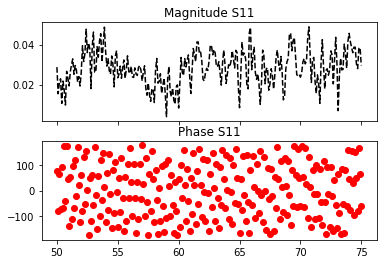

 It took 52 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Thru\w2p\True_Thru_WR15_Wave_Parameters_20180313_003.w2p
 It took 103 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Thru\w1p\port1\True_Thru_WR15_Wave_Parameters_Port1_20180313_003.w1p
 It took 153 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Thru\w1p\port2\True_Thru_WR15_Wave_Parameters_Port2_20180313_003.w1p
 It took 204 seconds
 Converting w2p to switch terms ...
Saving switch terms at C:\Share\WR15_OML_20180309\Thru\SwitchTerms\GTrue_Thru_WR15_Switch_Terms_20180313_003.s2p
 Measurements finished at 2018-03-13 15:51:47.750000
 Total time of measurements was 0:03:24.101000 


In [9]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Thru"
specific_description="True_Thru"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
print( " Converting w2p to switch terms ...")
switch_terms_directory=os.path.join(data_directory,subdirectory,"SwitchTerms")
name=auto_name(directory=switch_terms_directory,specific_descriptor="G"+specific_description,
               general_descriptor="WR15_Switch_Terms",extension="s2p")
switch_terms=W2p_to_SwitchTerms(w2p)
switch_terms.path=os.path.join(switch_terms_directory,name)
switch_terms.save()
print("Saving switch terms at {0}".format(os.path.join(switch_terms_directory,name)))
stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 16:21:11.883000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s2p\Kit_Short_P1_C15101_P2_WR15_20180313_001.s2p
 It took 50 seconds


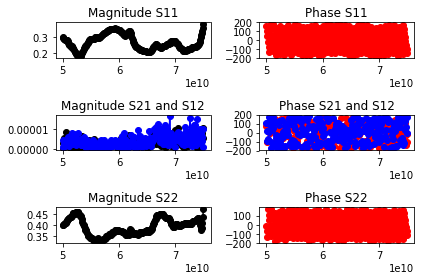

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s1p\port1\Kit_Short_P1_C15101_P2_WR15_Port1_20180313_001.s1p


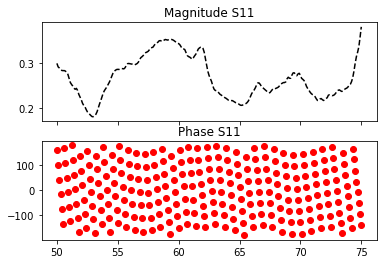

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s1p\port2\Kit_Short_P1_C15101_P2_WR15_Port2_20180313_001.s1p


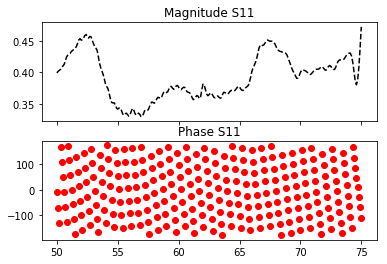

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Shorts\w2p\Kit_Short_P1_C15101_P2_WR15_Wave_Parameters_20180313_001.w2p
 It took 104 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Shorts\w1p\port1\Kit_Short_P1_C15101_P2_WR15_Wave_Parameters_Port1_20180313_002.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Shorts\w1p\port2\Kit_Short_P1_C15101_P2_WR15_Wave_Parameters_Port2_20180313_002.w1p
 It took 204 seconds
 Measurements finished at 2018-03-13 16:24:36.865000
 Total time of measurements was 0:03:24.982000 


In [12]:
# The first standard I connected to port 2 was not C15101 it was an unknown flat short that appears to be deffective!! 
# Renamed files
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Shorts"
specific_description="Kit_Short_P1_C15101_P2"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 16:26:47.447000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s2p\Kit_Short_P1_C15101_P2_WR15_20180313_002.s2p
 It took 50 seconds


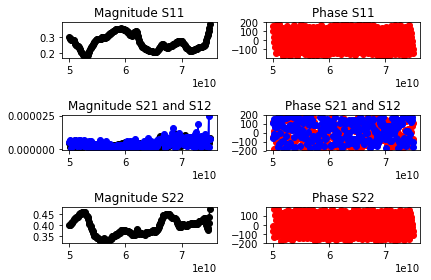

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s1p\port1\Kit_Short_P1_C15101_P2_WR15_Port1_20180313_002.s1p


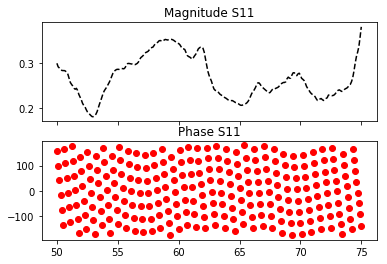

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s1p\port2\Kit_Short_P1_C15101_P2_WR15_Port2_20180313_002.s1p


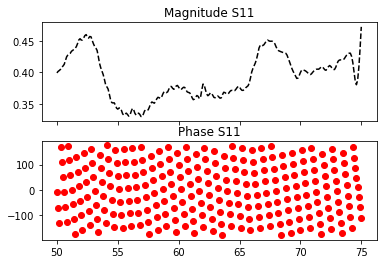

 It took 52 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Shorts\w2p\Kit_Short_P1_C15101_P2_WR15_Wave_Parameters_20180313_002.w2p
 It took 103 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Shorts\w1p\port1\Kit_Short_P1_C15101_P2_WR15_Wave_Parameters_Port1_20180313_003.w1p
 It took 153 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Shorts\w1p\port2\Kit_Short_P1_C15101_P2_WR15_Wave_Parameters_Port2_20180313_003.w1p
 It took 203 seconds
 Measurements finished at 2018-03-13 16:30:11.308000
 Total time of measurements was 0:03:23.861000 


In [13]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Shorts"
specific_description="Kit_Short_P1_C15101_P2"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 16:32:01.534000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s2p\Kit_Short_P1_C15101_P2_WR15_20180313_003.s2p
 It took 50 seconds


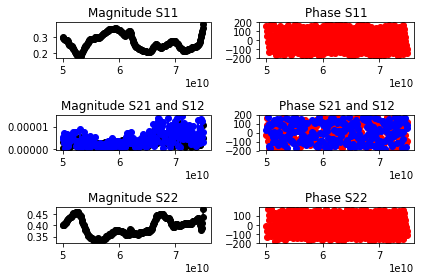

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s1p\port1\Kit_Short_P1_C15101_P2_WR15_Port1_20180313_003.s1p


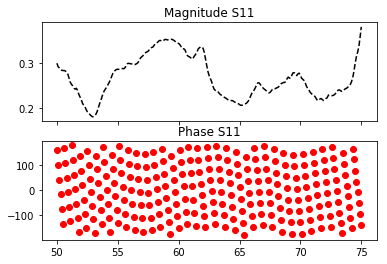

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s1p\port2\Kit_Short_P1_C15101_P2_WR15_Port2_20180313_003.s1p


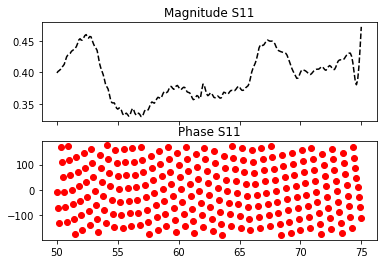

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Shorts\w2p\Kit_Short_P1_C15101_P2_WR15_Wave_Parameters_20180313_003.w2p
 It took 103 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Shorts\w1p\port1\Kit_Short_P1_C15101_P2_WR15_Wave_Parameters_Port1_20180313_004.w1p
 It took 153 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Shorts\w1p\port2\Kit_Short_P1_C15101_P2_WR15_Wave_Parameters_Port2_20180313_004.w1p
 It took 204 seconds
 Measurements finished at 2018-03-13 16:35:25.725000
 Total time of measurements was 0:03:24.191000 


In [14]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Shorts"
specific_description="Kit_Short_P1_C15101_P2"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 16:42:01.172000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s2p\C15101_P1_Kit_Short_P2_WR15_20180313_001.s2p
 It took 50 seconds


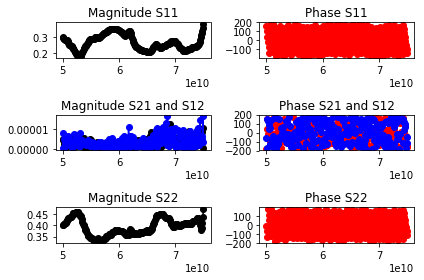

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s1p\port1\C15101_P1_Kit_Short_P2_WR15_Port1_20180313_001.s1p


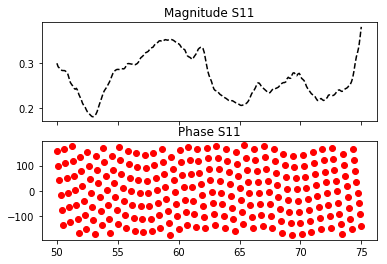

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s1p\port2\C15101_P1_Kit_Short_P2_WR15_Port2_20180313_001.s1p


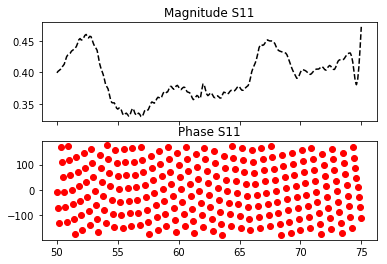

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Shorts\w2p\C15101_P1_Kit_Short_P2_WR15_Wave_Parameters_20180313_001.w2p
 It took 104 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Shorts\w1p\port1\C15101_P1_Kit_Short_P2_WR15_Wave_Parameters_Port1_20180313_001.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Shorts\w1p\port2\C15101_P1_Kit_Short_P2_WR15_Wave_Parameters_Port2_20180313_001.w1p
 It took 204 seconds
 Measurements finished at 2018-03-13 16:45:26.164000
 Total time of measurements was 0:03:24.992000 


In [15]:
#Direction Reversed
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Shorts"
specific_description="C15101_P1_Kit_Short_P2"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 16:47:34.080000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s2p\Kit_Short_P1_C15101_P2_WR15_20180313_004.s2p
 It took 50 seconds


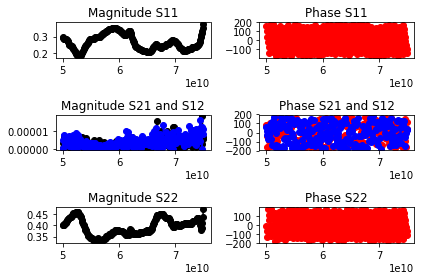

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s1p\port1\Kit_Short_P1_C15101_P2_WR15_Port1_20180313_004.s1p


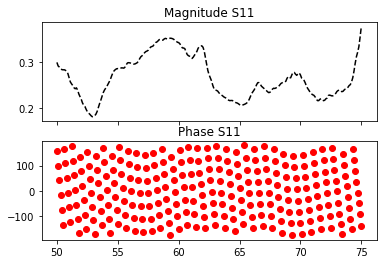

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s1p\port2\Kit_Short_P1_C15101_P2_WR15_Port2_20180313_004.s1p


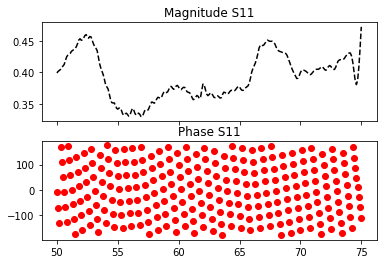

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Shorts\w2p\Kit_Short_P1_C15101_P2_WR15_Wave_Parameters_20180313_004.w2p
 It took 103 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Shorts\w1p\port1\Kit_Short_P1_C15101_P2_WR15_Wave_Parameters_Port1_20180313_004.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Shorts\w1p\port2\Kit_Short_P1_C15101_P2_WR15_Wave_Parameters_Port2_20180313_004.w1p
 It took 204 seconds
 Measurements finished at 2018-03-13 16:50:58.435000
 Total time of measurements was 0:03:24.355000 


In [16]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Shorts"
specific_description="Kit_Short_P1_C15101_P2"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 16:53:46.056000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s2p\Kit_Short_P1_C15101_P2_WR15_20180313_005.s2p
 It took 50 seconds


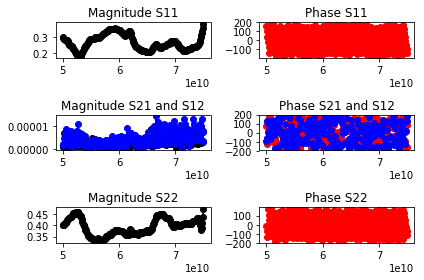

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s1p\port1\Kit_Short_P1_C15101_P2_WR15_Port1_20180313_005.s1p


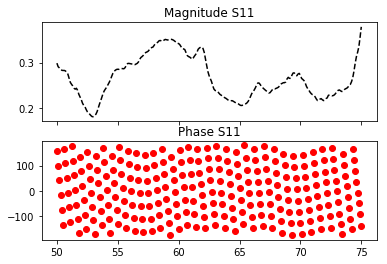

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s1p\port2\Kit_Short_P1_C15101_P2_WR15_Port2_20180313_005.s1p


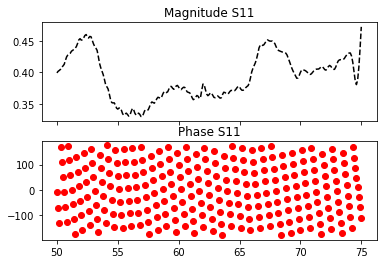

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Shorts\w2p\Kit_Short_P1_C15101_P2_WR15_Wave_Parameters_20180313_005.w2p
 It took 103 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Shorts\w1p\port1\Kit_Short_P1_C15101_P2_WR15_Wave_Parameters_Port1_20180313_004.w1p
 It took 153 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Shorts\w1p\port2\Kit_Short_P1_C15101_P2_WR15_Wave_Parameters_Port2_20180313_004.w1p
 It took 204 seconds
 Measurements finished at 2018-03-13 16:57:10.283000
 Total time of measurements was 0:03:24.227000 


In [17]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Shorts"
specific_description="Kit_Short_P1_C15101_P2"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 17:06:40.019000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s2p\RS_Short_100072_P1_Keysight_Short_P2_WR15_20180313_001.s2p
 It took 50 seconds


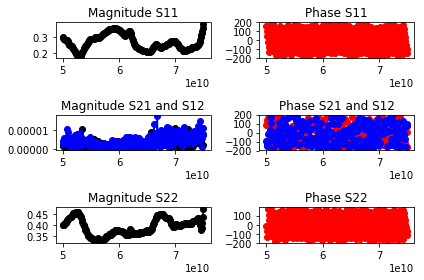

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s1p\port1\RS_Short_100072_P1_Keysight_Short_P2_WR15_Port1_20180313_001.s1p


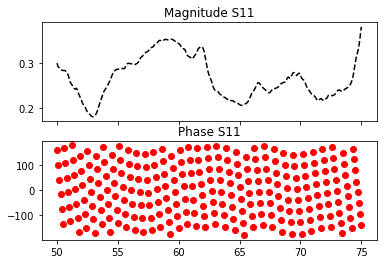

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s1p\port2\RS_Short_100072_P1_Keysight_Short_P2_WR15_Port2_20180313_001.s1p


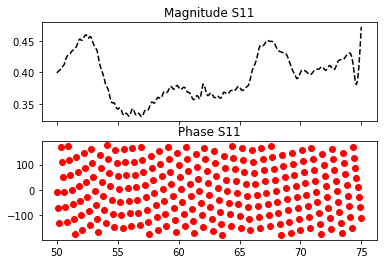

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Shorts\w2p\RS_Short_100072_P1_Keysight_Short_P2_WR15_Wave_Parameters_20180313_001.w2p
 It took 104 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Shorts\w1p\port1\RS_Short_100072_P1_Keysight_Short_P2_WR15_Wave_Parameters_Port1_20180313_001.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Shorts\w1p\port2\RS_Short_100072_P1_Keysight_Short_P2_WR15_Wave_Parameters_Port2_20180313_001.w1p
 It took 204 seconds
 Measurements finished at 2018-03-13 17:10:04.849000
 Total time of measurements was 0:03:24.830000 


In [18]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Shorts"
specific_description="RS_Short_100072_P1_Keysight_Short_P2"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 17:14:00.428000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s2p\RS_Short_100072_P1_Keysight_Short_P2_WR15_20180313_002.s2p
 It took 50 seconds


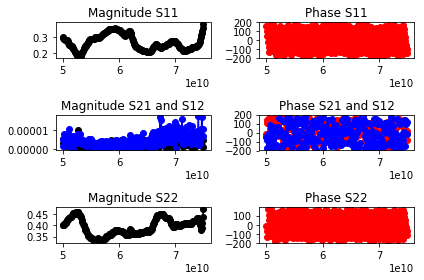

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s1p\port1\RS_Short_100072_P1_Keysight_Short_P2_WR15_Port1_20180313_002.s1p


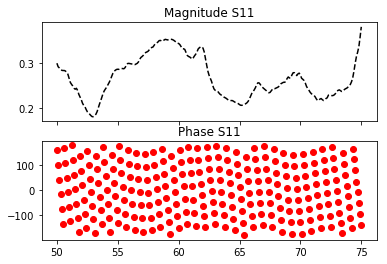

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s1p\port2\RS_Short_100072_P1_Keysight_Short_P2_WR15_Port2_20180313_002.s1p


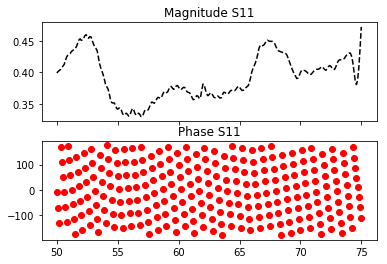

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Shorts\w2p\RS_Short_100072_P1_Keysight_Short_P2_WR15_Wave_Parameters_20180313_002.w2p
 It took 104 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Shorts\w1p\port1\RS_Short_100072_P1_Keysight_Short_P2_WR15_Wave_Parameters_Port1_20180313_002.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Shorts\w1p\port2\RS_Short_100072_P1_Keysight_Short_P2_WR15_Wave_Parameters_Port2_20180313_002.w1p
 It took 204 seconds
 Measurements finished at 2018-03-13 17:17:25.273000
 Total time of measurements was 0:03:24.845000 


In [19]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Shorts"
specific_description="RS_Short_100072_P1_Keysight_Short_P2"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 17:25:02.837000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s2p\RS_Short_100072_P1_Keysight_Short_P2_WR15_20180313_003.s2p
 It took 50 seconds


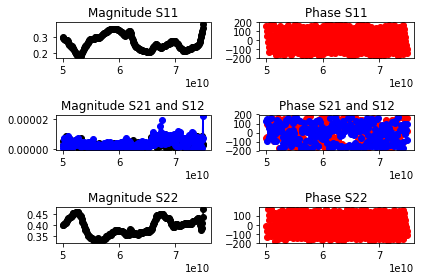

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s1p\port1\RS_Short_100072_P1_Keysight_Short_P2_WR15_Port1_20180313_003.s1p


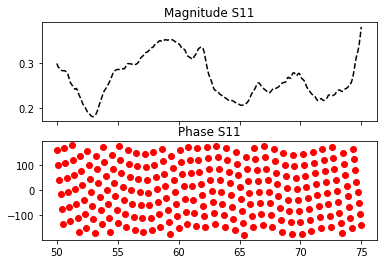

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Shorts\s1p\port2\RS_Short_100072_P1_Keysight_Short_P2_WR15_Port2_20180313_003.s1p


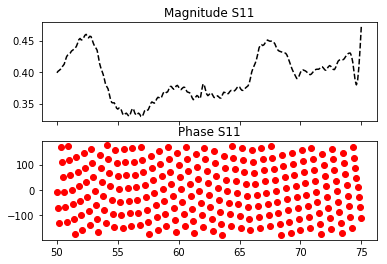

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Shorts\w2p\RS_Short_100072_P1_Keysight_Short_P2_WR15_Wave_Parameters_20180313_003.w2p
 It took 104 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Shorts\w1p\port1\RS_Short_100072_P1_Keysight_Short_P2_WR15_Wave_Parameters_Port1_20180313_003.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Shorts\w1p\port2\RS_Short_100072_P1_Keysight_Short_P2_WR15_Wave_Parameters_Port2_20180313_003.w1p
 It took 204 seconds
 Measurements finished at 2018-03-13 17:28:27.523000
 Total time of measurements was 0:03:24.686000 


In [20]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Shorts"
specific_description="RS_Short_100072_P1_Keysight_Short_P2"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 17:38:24.726000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Opens\s2p\Kit_Open_P1_C15102_P2_WR15_20180313_001.s2p
 It took 50 seconds


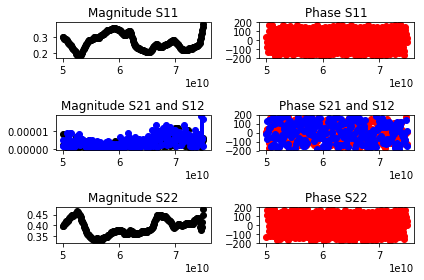

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Opens\s1p\port1\Kit_Open_P1_C15102_P2_WR15_Port1_20180313_001.s1p


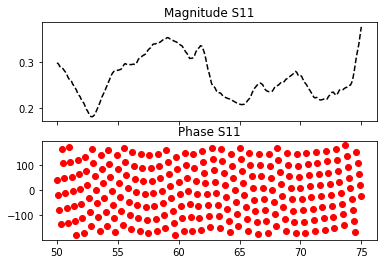

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Opens\s1p\port2\Kit_Open_P1_C15102_P2_WR15_Port2_20180313_001.s1p


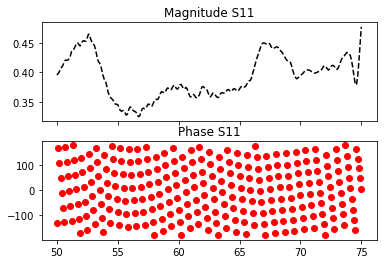

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Opens\w2p\Kit_Open_P1_C15102_P2_WR15_Wave_Parameters_20180313_001.w2p
 It took 103 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Opens\w1p\port1\Kit_Open_P1_C15102_P2_WR15_Wave_Parameters_Port1_20180313_001.w1p
 It took 153 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Opens\w1p\port2\Kit_Open_P1_C15102_P2_WR15_Wave_Parameters_Port2_20180313_001.w1p
 It took 204 seconds
 Measurements finished at 2018-03-13 17:41:48.971000
 Total time of measurements was 0:03:24.245000 


In [21]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Opens"
specific_description="Kit_Open_P1_C15102_P2"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 17:44:39.628000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Opens\s2p\Kit_Open_P1_C15102_P2_WR15_20180313_002.s2p
 It took 50 seconds


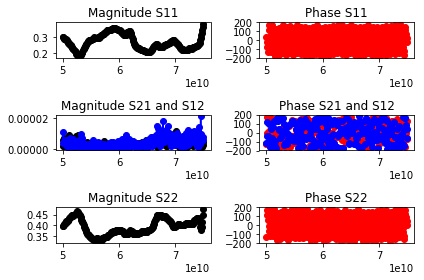

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Opens\s1p\port1\Kit_Open_P1_C15102_P2_WR15_Port1_20180313_002.s1p


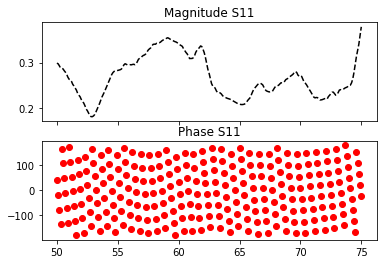

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Opens\s1p\port2\Kit_Open_P1_C15102_P2_WR15_Port2_20180313_002.s1p


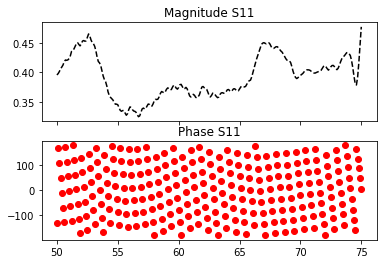

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Opens\w2p\Kit_Open_P1_C15102_P2_WR15_Wave_Parameters_20180313_002.w2p
 It took 103 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Opens\w1p\port1\Kit_Open_P1_C15102_P2_WR15_Wave_Parameters_Port1_20180313_002.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Opens\w1p\port2\Kit_Open_P1_C15102_P2_WR15_Wave_Parameters_Port2_20180313_002.w1p
 It took 204 seconds
 Measurements finished at 2018-03-13 17:48:04.246000
 Total time of measurements was 0:03:24.618000 


In [22]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Opens"
specific_description="Kit_Open_P1_C15102_P2"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 17:50:10.026000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Opens\s2p\Kit_Open_P1_C15102_P2_WR15_20180313_003.s2p
 It took 50 seconds


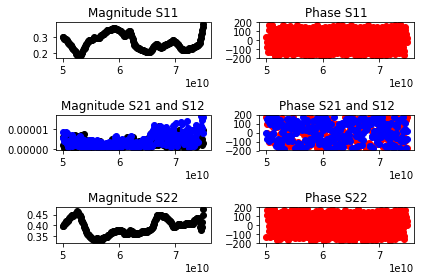

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Opens\s1p\port1\Kit_Open_P1_C15102_P2_WR15_Port1_20180313_003.s1p


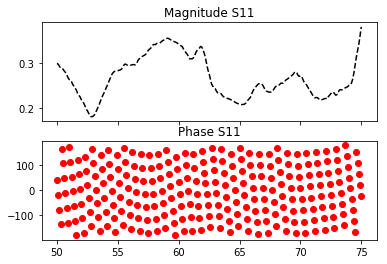

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Opens\s1p\port2\Kit_Open_P1_C15102_P2_WR15_Port2_20180313_003.s1p


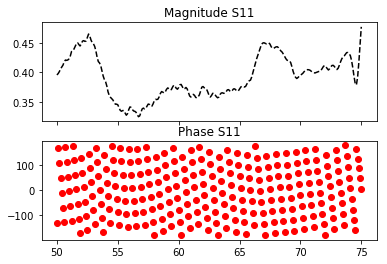

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Opens\w2p\Kit_Open_P1_C15102_P2_WR15_Wave_Parameters_20180313_003.w2p
 It took 103 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Opens\w1p\port1\Kit_Open_P1_C15102_P2_WR15_Wave_Parameters_Port1_20180313_003.w1p
 It took 153 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Opens\w1p\port2\Kit_Open_P1_C15102_P2_WR15_Wave_Parameters_Port2_20180313_003.w1p
 It took 204 seconds
 Measurements finished at 2018-03-13 17:53:34.180000
 Total time of measurements was 0:03:24.154000 


In [23]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Opens"
specific_description="Kit_Open_P1_C15102_P2"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 18:01:33.772000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Loads\s2p\RS_Match_100015_P1_Keysight_FixedLoad_70020_P2_WR15_20180313_001.s2p
 It took 50 seconds


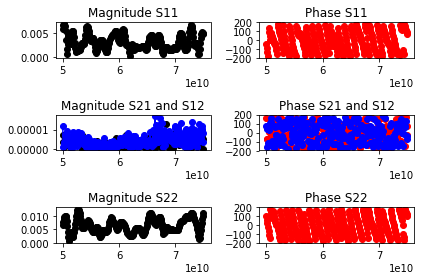

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Loads\s1p\port1\RS_Match_100015_P1_Keysight_FixedLoad_70020_P2_WR15_Port1_20180313_001.s1p


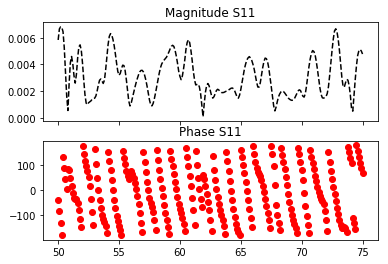

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Loads\s1p\port2\RS_Match_100015_P1_Keysight_FixedLoad_70020_P2_WR15_Port2_20180313_001.s1p


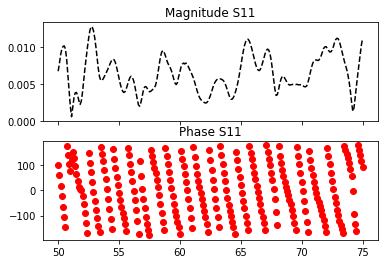

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Loads\w2p\RS_Match_100015_P1_Keysight_FixedLoad_70020_P2_WR15_Wave_Parameters_20180313_001.w2p
 It took 103 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Loads\w1p\port1\RS_Match_100015_P1_Keysight_FixedLoad_70020_P2_WR15_Wave_Parameters_Port1_20180313_001.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Loads\w1p\port2\RS_Match_100015_P1_Keysight_FixedLoad_70020_P2_WR15_Wave_Parameters_Port2_20180313_001.w1p
 It took 204 seconds
 Measurements finished at 2018-03-13 18:04:58.246000
 Total time of measurements was 0:03:24.474000 


In [24]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Loads"
specific_description="RS_Match_100015_P1_Keysight_FixedLoad_70020_P2"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 18:06:58.605000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Loads\s2p\RS_Match_100015_P1_Keysight_FixedLoad_70020_P2_WR15_20180313_002.s2p
 It took 50 seconds


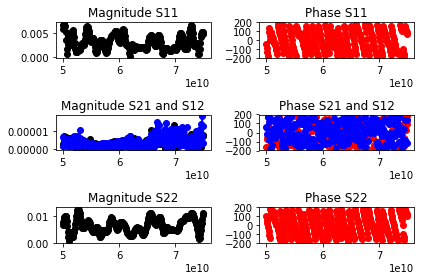

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Loads\s1p\port1\RS_Match_100015_P1_Keysight_FixedLoad_70020_P2_WR15_Port1_20180313_002.s1p


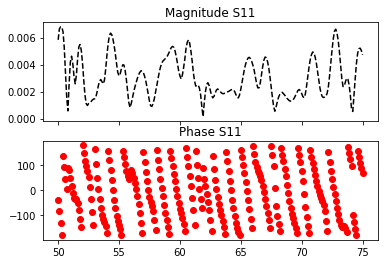

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Loads\s1p\port2\RS_Match_100015_P1_Keysight_FixedLoad_70020_P2_WR15_Port2_20180313_002.s1p


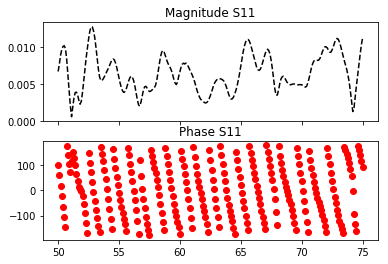

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Loads\w2p\RS_Match_100015_P1_Keysight_FixedLoad_70020_P2_WR15_Wave_Parameters_20180313_002.w2p
 It took 104 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Loads\w1p\port1\RS_Match_100015_P1_Keysight_FixedLoad_70020_P2_WR15_Wave_Parameters_Port1_20180313_002.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Loads\w1p\port2\RS_Match_100015_P1_Keysight_FixedLoad_70020_P2_WR15_Wave_Parameters_Port2_20180313_002.w1p
 It took 205 seconds
 Measurements finished at 2018-03-13 18:10:23.708000
 Total time of measurements was 0:03:25.103000 


In [25]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Loads"
specific_description="RS_Match_100015_P1_Keysight_FixedLoad_70020_P2"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 18:11:31.103000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Loads\s2p\RS_Match_100015_P1_Keysight_FixedLoad_70020_P2_WR15_20180313_003.s2p
 It took 50 seconds


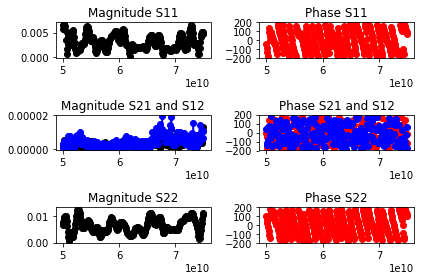

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Loads\s1p\port1\RS_Match_100015_P1_Keysight_FixedLoad_70020_P2_WR15_Port1_20180313_003.s1p


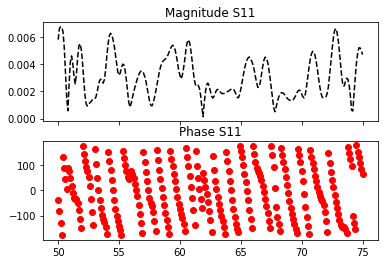

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Loads\s1p\port2\RS_Match_100015_P1_Keysight_FixedLoad_70020_P2_WR15_Port2_20180313_003.s1p


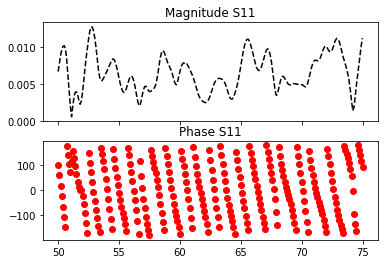

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Loads\w2p\RS_Match_100015_P1_Keysight_FixedLoad_70020_P2_WR15_Wave_Parameters_20180313_003.w2p
 It took 104 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Loads\w1p\port1\RS_Match_100015_P1_Keysight_FixedLoad_70020_P2_WR15_Wave_Parameters_Port1_20180313_003.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Loads\w1p\port2\RS_Match_100015_P1_Keysight_FixedLoad_70020_P2_WR15_Wave_Parameters_Port2_20180313_003.w1p
 It took 205 seconds
 Measurements finished at 2018-03-13 18:14:56.131000
 Total time of measurements was 0:03:25.028000 


In [26]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Loads"
specific_description="RS_Match_100015_P1_Keysight_FixedLoad_70020_P2"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 18:30:35.529000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\OffsetShorts\s2p\RS_Short_WShim_P1_Keysight_Short_wShim_P2_WR15_20180313_001.s2p
 It took 50 seconds


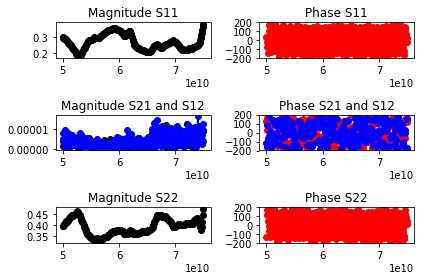

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\OffsetShorts\s1p\port1\RS_Short_WShim_P1_Keysight_Short_wShim_P2_WR15_Port1_20180313_001.s1p


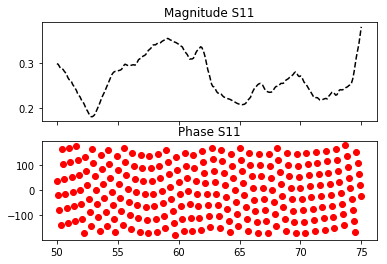

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\OffsetShorts\s1p\port2\RS_Short_WShim_P1_Keysight_Short_wShim_P2_WR15_Port2_20180313_001.s1p


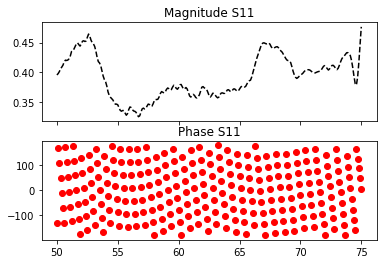

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\OffsetShorts\w2p\RS_Short_WShim_P1_Keysight_Short_wShim_P2_WR15_Wave_Parameters_20180313_001.w2p
 It took 104 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\OffsetShorts\w1p\port1\RS_Short_WShim_P1_Keysight_Short_wShim_P2_WR15_Wave_Parameters_Port1_20180313_001.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\OffsetShorts\w1p\port2\RS_Short_WShim_P1_Keysight_Short_wShim_P2_WR15_Wave_Parameters_Port2_20180313_001.w1p
 It took 204 seconds
 Measurements finished at 2018-03-13 18:34:00.365000
 Total time of measurements was 0:03:24.836000 


In [27]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="OffsetShorts"
specific_description="RS_Short_WShim_P1_Keysight_Short_wShim_P2"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 18:36:33.160000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\OffsetShorts\s2p\RS_Short_WShim_P1_Keysight_Short_wShim_P2_WR15_20180313_002.s2p
 It took 50 seconds


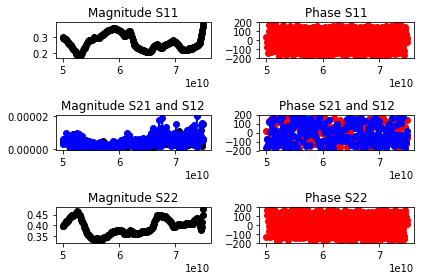

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\OffsetShorts\s1p\port1\RS_Short_WShim_P1_Keysight_Short_wShim_P2_WR15_Port1_20180313_002.s1p


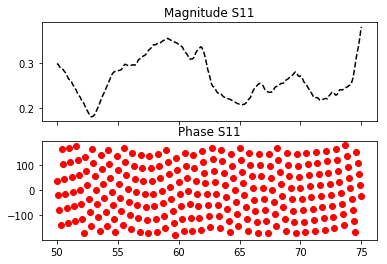

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\OffsetShorts\s1p\port2\RS_Short_WShim_P1_Keysight_Short_wShim_P2_WR15_Port2_20180313_002.s1p


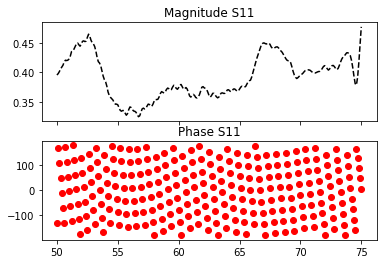

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\OffsetShorts\w2p\RS_Short_WShim_P1_Keysight_Short_wShim_P2_WR15_Wave_Parameters_20180313_002.w2p
 It took 103 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\OffsetShorts\w1p\port1\RS_Short_WShim_P1_Keysight_Short_wShim_P2_WR15_Wave_Parameters_Port1_20180313_002.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\OffsetShorts\w1p\port2\RS_Short_WShim_P1_Keysight_Short_wShim_P2_WR15_Wave_Parameters_Port2_20180313_002.w1p
 It took 204 seconds
 Measurements finished at 2018-03-13 18:39:57.656000
 Total time of measurements was 0:03:24.496000 


In [28]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="OffsetShorts"
specific_description="RS_Short_WShim_P1_Keysight_Short_wShim_P2"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 18:41:06.744000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\OffsetShorts\s2p\RS_Short_WShim_P1_Keysight_Short_wShim_P2_WR15_20180313_003.s2p
 It took 50 seconds


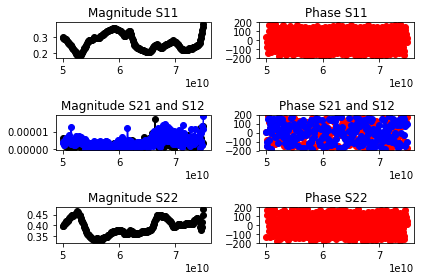

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\OffsetShorts\s1p\port1\RS_Short_WShim_P1_Keysight_Short_wShim_P2_WR15_Port1_20180313_003.s1p


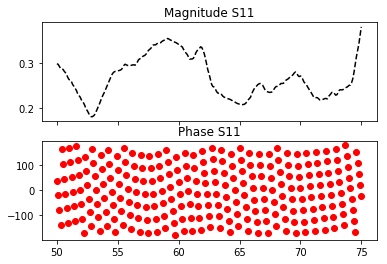

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\OffsetShorts\s1p\port2\RS_Short_WShim_P1_Keysight_Short_wShim_P2_WR15_Port2_20180313_003.s1p


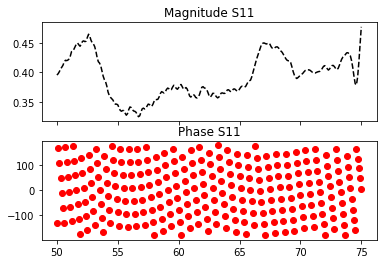

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\OffsetShorts\w2p\RS_Short_WShim_P1_Keysight_Short_wShim_P2_WR15_Wave_Parameters_20180313_003.w2p
 It took 104 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\OffsetShorts\w1p\port1\RS_Short_WShim_P1_Keysight_Short_wShim_P2_WR15_Wave_Parameters_Port1_20180313_003.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\OffsetShorts\w1p\port2\RS_Short_WShim_P1_Keysight_Short_wShim_P2_WR15_Wave_Parameters_Port2_20180313_003.w1p
 It took 205 seconds
 Measurements finished at 2018-03-13 18:44:31.782000
 Total time of measurements was 0:03:25.038000 


In [29]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="OffsetShorts"
specific_description="RS_Short_WShim_P1_Keysight_Short_wShim_P2"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 19:02:25.686000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\LineRS1612micro\s2p\Line_1612_micro_m_WR15_20180313_001.s2p
 It took 50 seconds


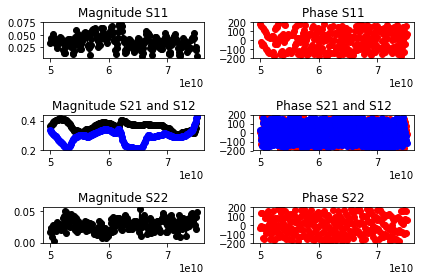

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\LineRS1612micro\s1p\port1\Line_1612_micro_m_WR15_Port1_20180313_001.s1p


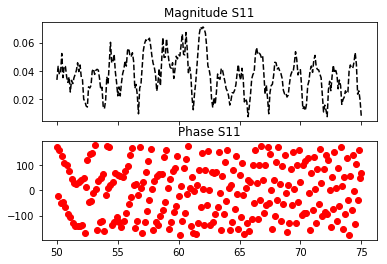

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\LineRS1612micro\s1p\port2\Line_1612_micro_m_WR15_Port2_20180313_001.s1p


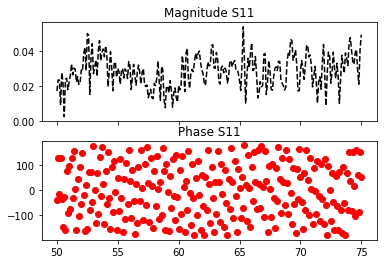

 It took 52 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\LineRS1612micro\w2p\Line_1612_micro_m_WR15_Wave_Parameters_20180313_001.w2p
 It took 103 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\LineRS1612micro\w1p\port1\Line_1612_micro_m_WR15_Wave_Parameters_Port1_20180313_001.w1p
 It took 153 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\LineRS1612micro\w1p\port2\Line_1612_micro_m_WR15_Wave_Parameters_Port2_20180313_001.w1p
 It took 203 seconds
 Measurements finished at 2018-03-13 19:05:49.563000
 Total time of measurements was 0:03:23.877000 
Begining Measurements at 2018-03-13 19:05:49.567000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\LineRS1612micro\s2p\Line_1612_micro_m_WR15_20180313_002.s2p
 It took 50 seconds


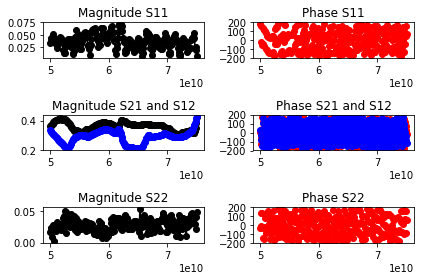

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\LineRS1612micro\s1p\port1\Line_1612_micro_m_WR15_Port1_20180313_002.s1p


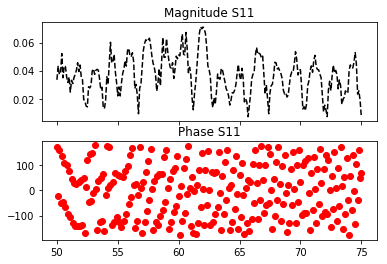

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\LineRS1612micro\s1p\port2\Line_1612_micro_m_WR15_Port2_20180313_002.s1p


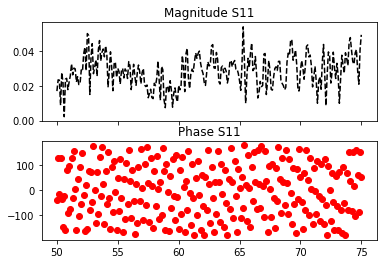

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\LineRS1612micro\w2p\Line_1612_micro_m_WR15_Wave_Parameters_20180313_002.w2p
 It took 103 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\LineRS1612micro\w1p\port1\Line_1612_micro_m_WR15_Wave_Parameters_Port1_20180313_002.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\LineRS1612micro\w1p\port2\Line_1612_micro_m_WR15_Wave_Parameters_Port2_20180313_002.w1p
 It took 204 seconds
 Measurements finished at 2018-03-13 19:09:14.023000
 Total time of measurements was 0:03:24.456000 
Begining Measurements at 2018-03-13 19:09:14.029000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\LineRS1612micro\s2p\Line_1612_micro_m_WR15_20180313_003.s2p
 It took 50 seconds


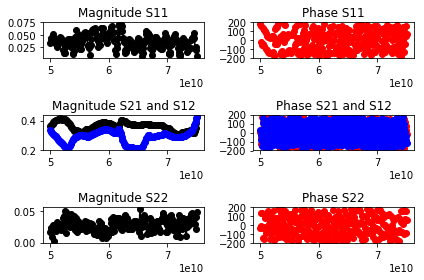

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\LineRS1612micro\s1p\port1\Line_1612_micro_m_WR15_Port1_20180313_003.s1p


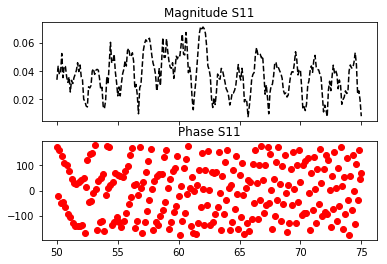

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\LineRS1612micro\s1p\port2\Line_1612_micro_m_WR15_Port2_20180313_003.s1p


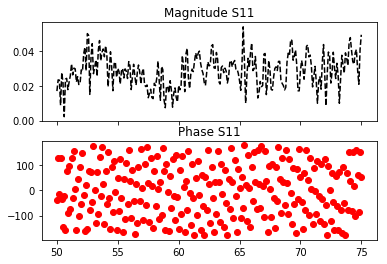

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\LineRS1612micro\w2p\Line_1612_micro_m_WR15_Wave_Parameters_20180313_003.w2p
 It took 103 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\LineRS1612micro\w1p\port1\Line_1612_micro_m_WR15_Wave_Parameters_Port1_20180313_003.w1p
 It took 153 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\LineRS1612micro\w1p\port2\Line_1612_micro_m_WR15_Wave_Parameters_Port2_20180313_003.w1p
 It took 204 seconds
 Measurements finished at 2018-03-13 19:12:38.241000
 Total time of measurements was 0:03:24.212000 


In [30]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="LineRS1612micro"
specific_description="Line_1612_micro_m"
for i in range(3):
    zva.set_IFBW(10)
    zva.set_frequency(frequency_start,frequency_stop,number_points)
    start=datetime.datetime.utcnow()
    print("Begining Measurements at {0}".format(start))
    print("IFBW is {0}".format(zva.get_IFBW()))


    # Measure s2p and store along with s1ps
    print("Measuring s2p ...")
    s2p=zva.measure_sparameters()
    s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
    name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15",extension="s2p")
    s2p.path=os.path.join(s2p_directory,name)
    s2p.save()

    print("Measured s2p, saved at {0}".format(s2p.path))
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))
    s2p.show();

    port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
    name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Port1",extension="s1p")
    port1_s1p=S2p_to_S1p(s2p,column="S11")
    port1_s1p.path=os.path.join(port_1_s1p_directory,name)
    port1_s1p.save()
    print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
    port1_s1p.show();

    port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
    name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Port2",extension="s1p")
    port2_s1p=S2p_to_S1p(s2p,column="S22")
    port2_s1p.path=os.path.join(port_2_s1p_directory,name)
    port2_s1p.save()
    print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
    port2_s1p.show();
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))
    # Measure w2p and w1ps as seperate trigger events 
    w2p=zva.measure_w2p()
    w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
    name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Wave_Parameters",extension="w2p")
    w2p.path=os.path.join(w2p_directory,name)
    w2p.save()
    w2p.options["IFBW"]=zva.get_IFBW()
    w2p.options["Power"]=zva.get_power()
    w2p.options["Extender"]="OML_V15VNA2R"
    w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
    w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
    print("Measured w2p, saved at {0}".format(w2p.path))
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))

    w1p_port1=zva.measure_w1p(port=1)
    w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
    name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
    w1p_port1.path=os.path.join(w1p_port1_directory,name)
    w1p_port1.save()
    w1p_port1.options["IFBW"]=zva.get_IFBW()
    w1p_port1.options["Power"]=zva.get_power()
    w1p_port1.options["Extender"]="OML_V15VNA2R"
    w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
    w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
    print("Measured w1p, saved at {0}".format(w1p_port1.path))
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))

    w1p_port2=zva.measure_w1p(port=2)
    w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
    name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
    w1p_port2.path=os.path.join(w1p_port2_directory,name)
    w1p_port2.save()
    w1p_port2.options["IFBW"]=zva.get_IFBW()
    w1p_port2.options["Power"]=zva.get_power()
    w1p_port2.options["Extender"]="OML_V15VNA2R"
    w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
    w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
    print("Measured w1p, saved at {0}".format(w1p_port2.path))
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))

    stop=datetime.datetime.utcnow()
    diff=stop-start
    print(" Measurements finished at {0}".format(stop))
    print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 19:20:26.227000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\LineRSPlusKeysight3224micro\s2p\Line_3224_micro_m_WR15_20180313_001.s2p
 It took 50 seconds


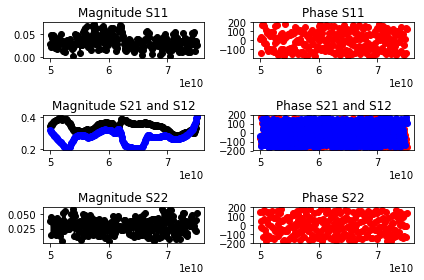

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\LineRSPlusKeysight3224micro\s1p\port1\Line_3224_micro_m_WR15_Port1_20180313_001.s1p


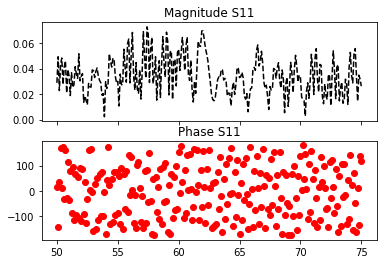

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\LineRSPlusKeysight3224micro\s1p\port2\Line_3224_micro_m_WR15_Port2_20180313_001.s1p


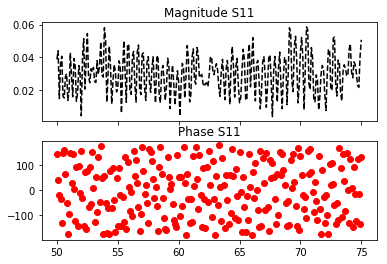

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\LineRSPlusKeysight3224micro\w2p\Line_3224_micro_m_WR15_Wave_Parameters_20180313_001.w2p
 It took 103 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\LineRSPlusKeysight3224micro\w1p\port1\Line_3224_micro_m_WR15_Wave_Parameters_Port1_20180313_001.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\LineRSPlusKeysight3224micro\w1p\port2\Line_3224_micro_m_WR15_Wave_Parameters_Port2_20180313_001.w1p
 It took 204 seconds
 Measurements finished at 2018-03-13 19:23:50.579000
 Total time of measurements was 0:03:24.352000 


In [31]:
# The screws dont fit just pushed together tightly
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="LineRSPlusKeysight3224micro"
specific_description="Line_3224_micro_m"
for i in range(1):
    zva.set_IFBW(10)
    zva.set_frequency(frequency_start,frequency_stop,number_points)
    start=datetime.datetime.utcnow()
    print("Begining Measurements at {0}".format(start))
    print("IFBW is {0}".format(zva.get_IFBW()))


    # Measure s2p and store along with s1ps
    print("Measuring s2p ...")
    s2p=zva.measure_sparameters()
    s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
    name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15",extension="s2p")
    s2p.path=os.path.join(s2p_directory,name)
    s2p.save()

    print("Measured s2p, saved at {0}".format(s2p.path))
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))
    s2p.show();

    port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
    name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Port1",extension="s1p")
    port1_s1p=S2p_to_S1p(s2p,column="S11")
    port1_s1p.path=os.path.join(port_1_s1p_directory,name)
    port1_s1p.save()
    print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
    port1_s1p.show();

    port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
    name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Port2",extension="s1p")
    port2_s1p=S2p_to_S1p(s2p,column="S22")
    port2_s1p.path=os.path.join(port_2_s1p_directory,name)
    port2_s1p.save()
    print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
    port2_s1p.show();
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))
    # Measure w2p and w1ps as seperate trigger events 
    w2p=zva.measure_w2p()
    w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
    name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Wave_Parameters",extension="w2p")
    w2p.path=os.path.join(w2p_directory,name)
    w2p.save()
    w2p.options["IFBW"]=zva.get_IFBW()
    w2p.options["Power"]=zva.get_power()
    w2p.options["Extender"]="OML_V15VNA2R"
    w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
    w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
    print("Measured w2p, saved at {0}".format(w2p.path))
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))

    w1p_port1=zva.measure_w1p(port=1)
    w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
    name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
    w1p_port1.path=os.path.join(w1p_port1_directory,name)
    w1p_port1.save()
    w1p_port1.options["IFBW"]=zva.get_IFBW()
    w1p_port1.options["Power"]=zva.get_power()
    w1p_port1.options["Extender"]="OML_V15VNA2R"
    w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
    w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
    print("Measured w1p, saved at {0}".format(w1p_port1.path))
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))

    w1p_port2=zva.measure_w1p(port=2)
    w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
    name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
    w1p_port2.path=os.path.join(w1p_port2_directory,name)
    w1p_port2.save()
    w1p_port2.options["IFBW"]=zva.get_IFBW()
    w1p_port2.options["Power"]=zva.get_power()
    w1p_port2.options["Extender"]="OML_V15VNA2R"
    w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
    w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
    print("Measured w1p, saved at {0}".format(w1p_port2.path))
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))

    stop=datetime.datetime.utcnow()
    diff=stop-start
    print(" Measurements finished at {0}".format(stop))
    print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 19:41:28.953000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Line4909\s2p\Line_4909_WR15_20180313_001.s2p
 It took 50 seconds


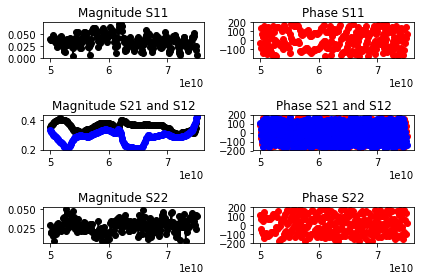

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Line4909\s1p\port1\Line_4909_WR15_Port1_20180313_001.s1p


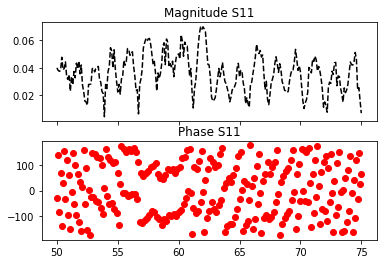

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Line4909\s1p\port2\Line_4909_WR15_Port2_20180313_001.s1p


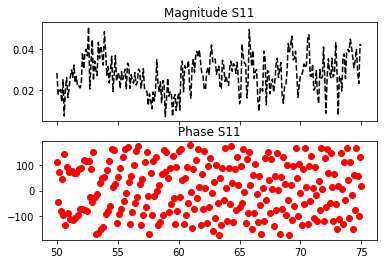

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Line4909\w2p\Line_4909_WR15_Wave_Parameters_20180313_001.w2p
 It took 104 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Line4909\w1p\port1\Line_4909_WR15_Wave_Parameters_Port1_20180313_001.w1p
 It took 155 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Line4909\w1p\port2\Line_4909_WR15_Wave_Parameters_Port2_20180313_001.w1p
 It took 205 seconds
 Measurements finished at 2018-03-13 19:44:54.272000
 Total time of measurements was 0:03:25.319000 
Begining Measurements at 2018-03-13 19:44:54.278000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Line4909\s2p\Line_4909_WR15_20180313_002.s2p
 It took 50 seconds


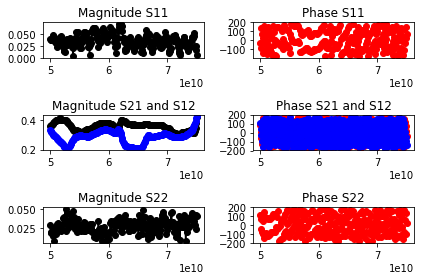

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Line4909\s1p\port1\Line_4909_WR15_Port1_20180313_002.s1p


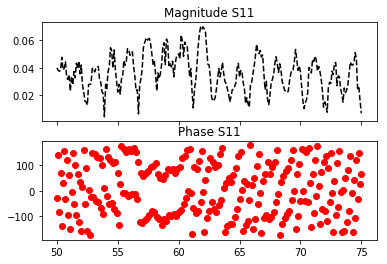

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Line4909\s1p\port2\Line_4909_WR15_Port2_20180313_002.s1p


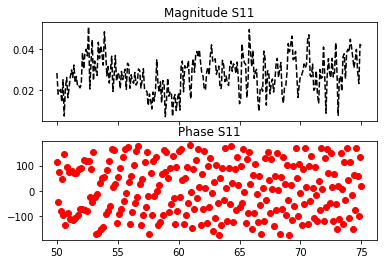

 It took 52 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Line4909\w2p\Line_4909_WR15_Wave_Parameters_20180313_002.w2p
 It took 102 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Line4909\w1p\port1\Line_4909_WR15_Wave_Parameters_Port1_20180313_002.w1p
 It took 153 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Line4909\w1p\port2\Line_4909_WR15_Wave_Parameters_Port2_20180313_002.w1p
 It took 203 seconds
 Measurements finished at 2018-03-13 19:48:17.714000
 Total time of measurements was 0:03:23.436000 
Begining Measurements at 2018-03-13 19:48:17.722000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Line4909\s2p\Line_4909_WR15_20180313_003.s2p
 It took 50 seconds


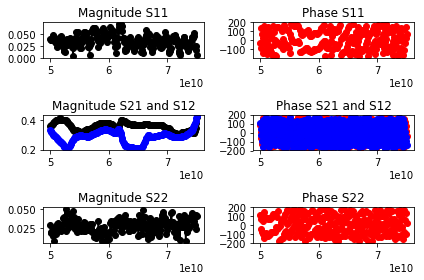

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Line4909\s1p\port1\Line_4909_WR15_Port1_20180313_003.s1p


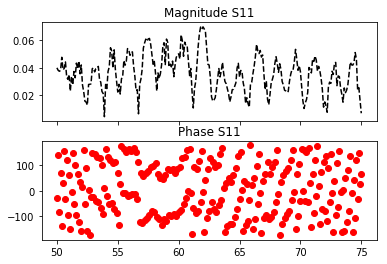

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Line4909\s1p\port2\Line_4909_WR15_Port2_20180313_003.s1p


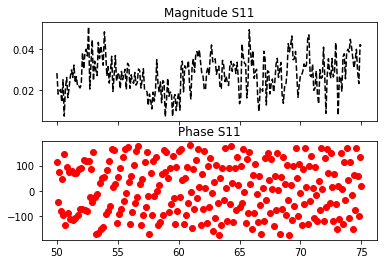

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Line4909\w2p\Line_4909_WR15_Wave_Parameters_20180313_003.w2p
 It took 103 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Line4909\w1p\port1\Line_4909_WR15_Wave_Parameters_Port1_20180313_003.w1p
 It took 153 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Line4909\w1p\port2\Line_4909_WR15_Wave_Parameters_Port2_20180313_003.w1p
 It took 204 seconds
 Measurements finished at 2018-03-13 19:51:41.981000
 Total time of measurements was 0:03:24.259000 


In [33]:
# The screws dont fit just pushed together tightly
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Line4909"
specific_description="Line_4909"
for i in range(3):
    zva.set_IFBW(10)
    zva.set_frequency(frequency_start,frequency_stop,number_points)
    start=datetime.datetime.utcnow()
    print("Begining Measurements at {0}".format(start))
    print("IFBW is {0}".format(zva.get_IFBW()))


    # Measure s2p and store along with s1ps
    print("Measuring s2p ...")
    s2p=zva.measure_sparameters()
    s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
    name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15",extension="s2p")
    s2p.path=os.path.join(s2p_directory,name)
    s2p.save()

    print("Measured s2p, saved at {0}".format(s2p.path))
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))
    s2p.show();

    port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
    name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Port1",extension="s1p")
    port1_s1p=S2p_to_S1p(s2p,column="S11")
    port1_s1p.path=os.path.join(port_1_s1p_directory,name)
    port1_s1p.save()
    print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
    port1_s1p.show();

    port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
    name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Port2",extension="s1p")
    port2_s1p=S2p_to_S1p(s2p,column="S22")
    port2_s1p.path=os.path.join(port_2_s1p_directory,name)
    port2_s1p.save()
    print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
    port2_s1p.show();
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))
    # Measure w2p and w1ps as seperate trigger events 
    w2p=zva.measure_w2p()
    w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
    name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Wave_Parameters",extension="w2p")
    w2p.path=os.path.join(w2p_directory,name)
    w2p.save()
    w2p.options["IFBW"]=zva.get_IFBW()
    w2p.options["Power"]=zva.get_power()
    w2p.options["Extender"]="OML_V15VNA2R"
    w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
    w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
    print("Measured w2p, saved at {0}".format(w2p.path))
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))

    w1p_port1=zva.measure_w1p(port=1)
    w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
    name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
    w1p_port1.path=os.path.join(w1p_port1_directory,name)
    w1p_port1.save()
    w1p_port1.options["IFBW"]=zva.get_IFBW()
    w1p_port1.options["Power"]=zva.get_power()
    w1p_port1.options["Extender"]="OML_V15VNA2R"
    w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
    w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
    print("Measured w1p, saved at {0}".format(w1p_port1.path))
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))

    w1p_port2=zva.measure_w1p(port=2)
    w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
    name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
    w1p_port2.path=os.path.join(w1p_port2_directory,name)
    w1p_port2.save()
    w1p_port2.options["IFBW"]=zva.get_IFBW()
    w1p_port2.options["Power"]=zva.get_power()
    w1p_port2.options["Extender"]="OML_V15VNA2R"
    w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
    w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
    print("Measured w1p, saved at {0}".format(w1p_port2.path))
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))

    stop=datetime.datetime.utcnow()
    diff=stop-start
    print(" Measurements finished at {0}".format(stop))
    print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 20:01:50.250000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Line5079\s2p\Line_5079_WR15_20180313_001.s2p
 It took 50 seconds


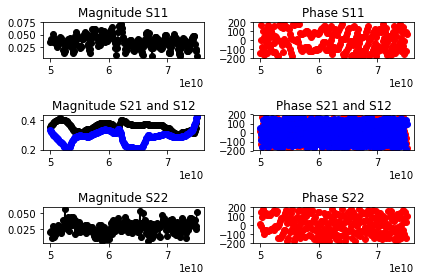

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Line5079\s1p\port1\Line_5079_WR15_Port1_20180313_001.s1p


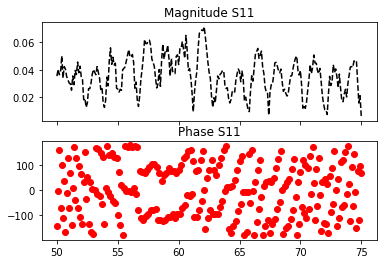

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Line5079\s1p\port2\Line_5079_WR15_Port2_20180313_001.s1p


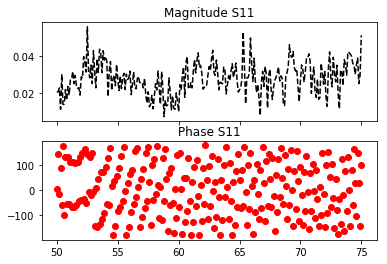

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Line5079\w2p\Line_5079_WR15_Wave_Parameters_20180313_001.w2p
 It took 104 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Line5079\w1p\port1\Line_5079_WR15_Wave_Parameters_Port1_20180313_001.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Line5079\w1p\port2\Line_5079_WR15_Wave_Parameters_Port2_20180313_001.w1p
 It took 204 seconds
 Measurements finished at 2018-03-13 20:05:15.003000
 Total time of measurements was 0:03:24.753000 
Begining Measurements at 2018-03-13 20:05:15.011000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Line5079\s2p\Line_5079_WR15_20180313_002.s2p
 It took 50 seconds


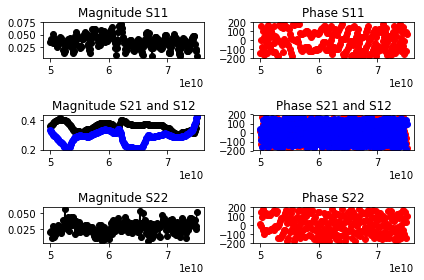

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Line5079\s1p\port1\Line_5079_WR15_Port1_20180313_002.s1p


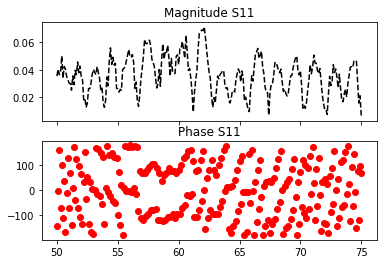

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Line5079\s1p\port2\Line_5079_WR15_Port2_20180313_002.s1p


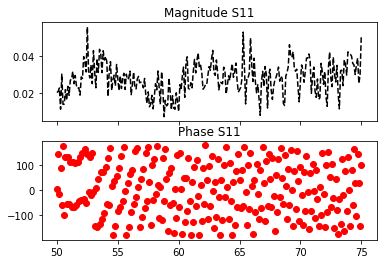

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Line5079\w2p\Line_5079_WR15_Wave_Parameters_20180313_002.w2p
 It took 104 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Line5079\w1p\port1\Line_5079_WR15_Wave_Parameters_Port1_20180313_002.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Line5079\w1p\port2\Line_5079_WR15_Wave_Parameters_Port2_20180313_002.w1p
 It took 204 seconds
 Measurements finished at 2018-03-13 20:08:39.816000
 Total time of measurements was 0:03:24.805000 
Begining Measurements at 2018-03-13 20:08:39.823000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Line5079\s2p\Line_5079_WR15_20180313_003.s2p
 It took 50 seconds


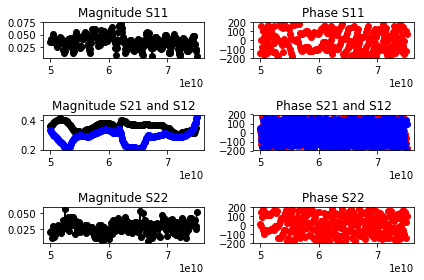

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Line5079\s1p\port1\Line_5079_WR15_Port1_20180313_003.s1p


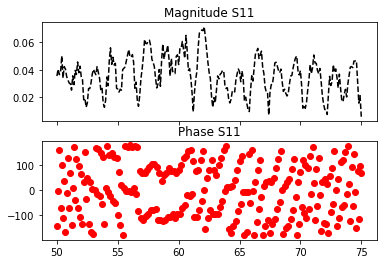

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Line5079\s1p\port2\Line_5079_WR15_Port2_20180313_003.s1p


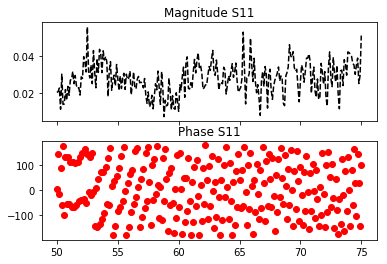

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Line5079\w2p\Line_5079_WR15_Wave_Parameters_20180313_003.w2p
 It took 103 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Line5079\w1p\port1\Line_5079_WR15_Wave_Parameters_Port1_20180313_003.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Line5079\w1p\port2\Line_5079_WR15_Wave_Parameters_Port2_20180313_003.w1p
 It took 204 seconds
 Measurements finished at 2018-03-13 20:12:04.174000
 Total time of measurements was 0:03:24.351000 


In [34]:
# The screws dont fit just pushed together tightly
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Line5079"
specific_description="Line_5079"
for i in range(3):
    zva.set_IFBW(10)
    zva.set_frequency(frequency_start,frequency_stop,number_points)
    start=datetime.datetime.utcnow()
    print("Begining Measurements at {0}".format(start))
    print("IFBW is {0}".format(zva.get_IFBW()))


    # Measure s2p and store along with s1ps
    print("Measuring s2p ...")
    s2p=zva.measure_sparameters()
    s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
    name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15",extension="s2p")
    s2p.path=os.path.join(s2p_directory,name)
    s2p.save()

    print("Measured s2p, saved at {0}".format(s2p.path))
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))
    s2p.show();

    port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
    name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Port1",extension="s1p")
    port1_s1p=S2p_to_S1p(s2p,column="S11")
    port1_s1p.path=os.path.join(port_1_s1p_directory,name)
    port1_s1p.save()
    print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
    port1_s1p.show();

    port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
    name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Port2",extension="s1p")
    port2_s1p=S2p_to_S1p(s2p,column="S22")
    port2_s1p.path=os.path.join(port_2_s1p_directory,name)
    port2_s1p.save()
    print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
    port2_s1p.show();
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))
    # Measure w2p and w1ps as seperate trigger events 
    w2p=zva.measure_w2p()
    w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
    name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Wave_Parameters",extension="w2p")
    w2p.path=os.path.join(w2p_directory,name)
    w2p.save()
    w2p.options["IFBW"]=zva.get_IFBW()
    w2p.options["Power"]=zva.get_power()
    w2p.options["Extender"]="OML_V15VNA2R"
    w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
    w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
    print("Measured w2p, saved at {0}".format(w2p.path))
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))

    w1p_port1=zva.measure_w1p(port=1)
    w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
    name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
    w1p_port1.path=os.path.join(w1p_port1_directory,name)
    w1p_port1.save()
    w1p_port1.options["IFBW"]=zva.get_IFBW()
    w1p_port1.options["Power"]=zva.get_power()
    w1p_port1.options["Extender"]="OML_V15VNA2R"
    w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
    w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
    print("Measured w1p, saved at {0}".format(w1p_port1.path))
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))

    w1p_port2=zva.measure_w1p(port=2)
    w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
    name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
    w1p_port2.path=os.path.join(w1p_port2_directory,name)
    w1p_port2.save()
    w1p_port2.options["IFBW"]=zva.get_IFBW()
    w1p_port2.options["Power"]=zva.get_power()
    w1p_port2.options["Extender"]="OML_V15VNA2R"
    w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
    w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
    print("Measured w1p, saved at {0}".format(w1p_port2.path))
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))

    stop=datetime.datetime.utcnow()
    diff=stop-start
    print(" Measurements finished at {0}".format(stop))
    print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-13 20:31:01.538000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Atten3DB\s2p\Kit_Attenuator_3dB_WR15_20180313_001.s2p
 It took 50 seconds


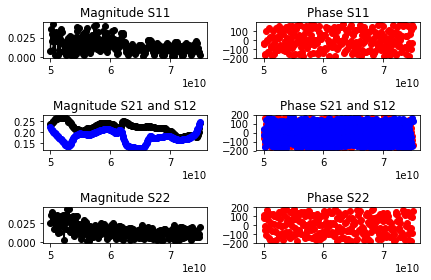

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Atten3DB\s1p\port1\Kit_Attenuator_3dB_WR15_Port1_20180313_001.s1p


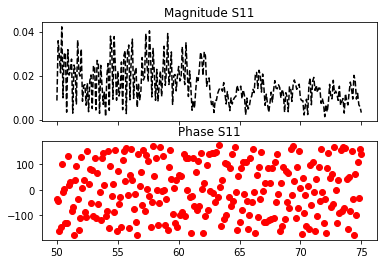

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Atten3DB\s1p\port2\Kit_Attenuator_3dB_WR15_Port2_20180313_001.s1p


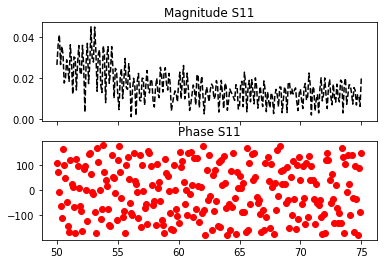

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Atten3DB\w2p\Kit_Attenuator_3dB_WR15_Wave_Parameters_20180313_001.w2p
 It took 103 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Atten3DB\w1p\port1\Kit_Attenuator_3dB_WR15_Wave_Parameters_Port1_20180313_001.w1p
 It took 153 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Atten3DB\w1p\port2\Kit_Attenuator_3dB_WR15_Wave_Parameters_Port2_20180313_001.w1p
 It took 204 seconds
 Measurements finished at 2018-03-13 20:34:25.689000
 Total time of measurements was 0:03:24.151000 
Begining Measurements at 2018-03-13 20:34:25.693000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Atten3DB\s2p\Kit_Attenuator_3dB_WR15_20180313_002.s2p
 It took 50 seconds


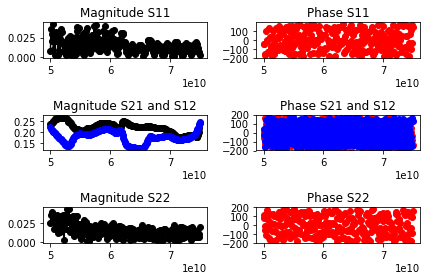

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Atten3DB\s1p\port1\Kit_Attenuator_3dB_WR15_Port1_20180313_002.s1p


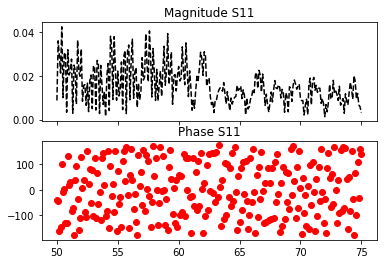

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Atten3DB\s1p\port2\Kit_Attenuator_3dB_WR15_Port2_20180313_002.s1p


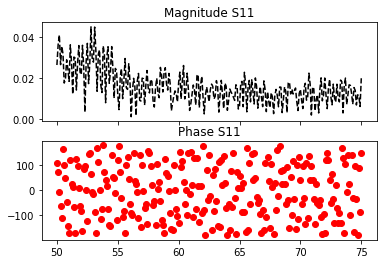

 It took 52 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Atten3DB\w2p\Kit_Attenuator_3dB_WR15_Wave_Parameters_20180313_002.w2p
 It took 103 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Atten3DB\w1p\port1\Kit_Attenuator_3dB_WR15_Wave_Parameters_Port1_20180313_002.w1p
 It took 153 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Atten3DB\w1p\port2\Kit_Attenuator_3dB_WR15_Wave_Parameters_Port2_20180313_002.w1p
 It took 203 seconds
 Measurements finished at 2018-03-13 20:37:49.464000
 Total time of measurements was 0:03:23.771000 
Begining Measurements at 2018-03-13 20:37:49.470000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Atten3DB\s2p\Kit_Attenuator_3dB_WR15_20180313_003.s2p
 It took 50 seconds


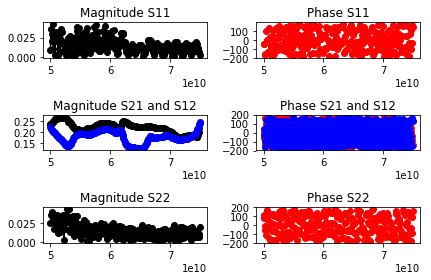

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Atten3DB\s1p\port1\Kit_Attenuator_3dB_WR15_Port1_20180313_003.s1p


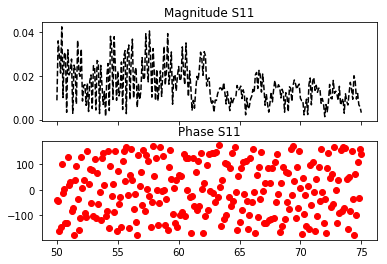

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Atten3DB\s1p\port2\Kit_Attenuator_3dB_WR15_Port2_20180313_003.s1p


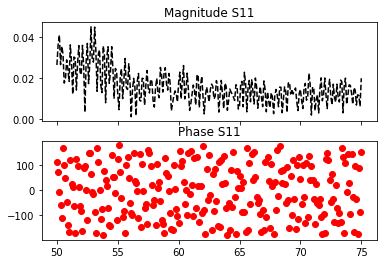

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Atten3DB\w2p\Kit_Attenuator_3dB_WR15_Wave_Parameters_20180313_003.w2p
 It took 103 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Atten3DB\w1p\port1\Kit_Attenuator_3dB_WR15_Wave_Parameters_Port1_20180313_003.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Atten3DB\w1p\port2\Kit_Attenuator_3dB_WR15_Wave_Parameters_Port2_20180313_003.w1p
 It took 204 seconds
 Measurements finished at 2018-03-13 20:41:13.938000
 Total time of measurements was 0:03:24.468000 


In [35]:
# The screws dont fit just pushed together tightly
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Atten3DB"
specific_description="Kit_Attenuator_3dB"
for i in range(3):
    zva.set_IFBW(10)
    zva.set_frequency(frequency_start,frequency_stop,number_points)
    start=datetime.datetime.utcnow()
    print("Begining Measurements at {0}".format(start))
    print("IFBW is {0}".format(zva.get_IFBW()))


    # Measure s2p and store along with s1ps
    print("Measuring s2p ...")
    s2p=zva.measure_sparameters()
    s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
    name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15",extension="s2p")
    s2p.path=os.path.join(s2p_directory,name)
    s2p.save()

    print("Measured s2p, saved at {0}".format(s2p.path))
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))
    s2p.show();

    port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
    name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Port1",extension="s1p")
    port1_s1p=S2p_to_S1p(s2p,column="S11")
    port1_s1p.path=os.path.join(port_1_s1p_directory,name)
    port1_s1p.save()
    print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
    port1_s1p.show();

    port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
    name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Port2",extension="s1p")
    port2_s1p=S2p_to_S1p(s2p,column="S22")
    port2_s1p.path=os.path.join(port_2_s1p_directory,name)
    port2_s1p.save()
    print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
    port2_s1p.show();
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))
    # Measure w2p and w1ps as seperate trigger events 
    w2p=zva.measure_w2p()
    w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
    name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Wave_Parameters",extension="w2p")
    w2p.path=os.path.join(w2p_directory,name)
    w2p.save()
    w2p.options["IFBW"]=zva.get_IFBW()
    w2p.options["Power"]=zva.get_power()
    w2p.options["Extender"]="OML_V15VNA2R"
    w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
    w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
    print("Measured w2p, saved at {0}".format(w2p.path))
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))

    w1p_port1=zva.measure_w1p(port=1)
    w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
    name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
    w1p_port1.path=os.path.join(w1p_port1_directory,name)
    w1p_port1.save()
    w1p_port1.options["IFBW"]=zva.get_IFBW()
    w1p_port1.options["Power"]=zva.get_power()
    w1p_port1.options["Extender"]="OML_V15VNA2R"
    w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
    w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
    print("Measured w1p, saved at {0}".format(w1p_port1.path))
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))

    w1p_port2=zva.measure_w1p(port=2)
    w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
    name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
                   general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
    w1p_port2.path=os.path.join(w1p_port2_directory,name)
    w1p_port2.save()
    w1p_port2.options["IFBW"]=zva.get_IFBW()
    w1p_port2.options["Power"]=zva.get_power()
    w1p_port2.options["Extender"]="OML_V15VNA2R"
    w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
    w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
    print("Measured w1p, saved at {0}".format(w1p_port2.path))
    current_time=datetime.datetime.utcnow()-start
    print(" It took {0} seconds".format(current_time.seconds))

    stop=datetime.datetime.utcnow()
    diff=stop-start
    print(" Measurements finished at {0}".format(stop))
    print(" Total time of measurements was {0} ".format(diff))